In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 0
setup_one_gpu(GPU)

Picking GPU 0


In [18]:
import sys
import numpy as np
import os.path as osp
from evaluator import Evaluator
from general_tools.in_out.basics import files_in_subdirs
from helper import stored_synthetic_samples, top_evaluation_dir
import matplotlib.pylab as plt

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
class_name = 'chair'
save_res = False
top_out_dir = top_evaluation_dir
experiment_name = 'r_gan'

sample_mmd = False
n_samples = 10
ref_pop = 40
sample_pop = 200
mmd_loss = 'chamfer'
special_tag = 'chamfer_5boost_hist'

boost_samples = 5

skip = ['train', 'val']
epochs_to_check = [1700]

In [29]:
top_sample_dir = stored_synthetic_samples(class_name)[experiment_name]

In [30]:
if save_res:
    exp_name = osp.basename(top_sample_dir)
    f_mmd = open(osp.join(top_out_dir, class_name, 'mmd_' + special_tag + exp_name + '.txt'), 'w')
else:
    f_jsd = sys.stdout
    f_mmd = sys.stdout

In [8]:
# if experiment_name.startswith('l_') and 'gan' in experiment_name:
#     epochs_to_check = np.hstack([np.array([1, 5, 10]), np.arange(100, 2001, 100)])
# elif experiment_name.startswith('r_gan'):
#     epochs_to_check = np.hstack([np.array([1, 5, 10]), np.arange(50, 2001, 50)])

In [31]:
sample_files = []
if 'gan' in experiment_name:
    for epoch in epochs_to_check:
        sample_files.append(osp.join(top_sample_dir, 'epoch_%d.npz' % (epoch,) ))
elif 'gmm' in experiment_name:
    for f in files_in_subdirs(top_sample_dir, '.npz'):
        sample_files.append(f) 
else:
    assert False

In [32]:
evaluator = Evaluator(class_name)
evaluator.load_gt_data()

In [33]:
for sample_file in sample_files:
    evaluator.prepare_sample_data(sample_file, boost_samples)
    sample_name = osp.basename(sample_file)[:-len('.npz')]
    print sample_name
    f_mmd.write(sample_name + '\n')
    all_d = evaluator.compute_mmd(loss=mmd_loss, sample_estimator=sample_mmd, n_samples=n_samples, 
                          ref_pop_size=ref_pop, sample_pop_size=sample_pop,
                          f_out=f_mmd, skip=skip)
    f_mmd.flush()
    print

epoch_1700
epoch_1700
test 0.00182253 0.00107812



In [34]:
%matplotlib inline

In [53]:
len(all_d['test'])

679

In [65]:
l_h = np.load('l_emd_hist_test.npz')
l_h = l_h[l_h.keys()[0]]



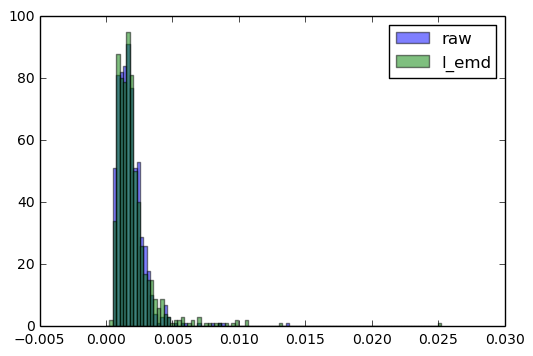

In [73]:
r_h = np.array(all_d['test'])


bins = np.linspace(-0.000001, np.max([r_h, l_h]), 100)               

plt.hist(r_h, bins, alpha=0.5, label='raw')
plt.hist(l_h, bins, alpha=0.5, label='l_emd')
plt.legend(loc='upper right')


In [ ]:
if save_res:
    if do_jsd:
        f_jsd.close()
    if do_mmd:
        f_mmd.close()